<a href="https://colab.research.google.com/github/Joshua-Woodard/Time_Series_Forecasting_with_TensorFlow/blob/main/time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

**NOTE:** NOT FINANCIAL ADVICE

See GitHub for necessary links (https://github.com/mrdbourke/tensorflow-deep-learning)

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-07-06 15:55:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-07-06 15:55:37 (11.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import with pandas
import pandas as pd

# Read in Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years, but there's only 2787 samples. 

Typically deep learning models usually like lots of samples (thousands to tens of thousands to millions, etc...)

A smaller number of samples is something you'll often run into with time series data problems.

> **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So four our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


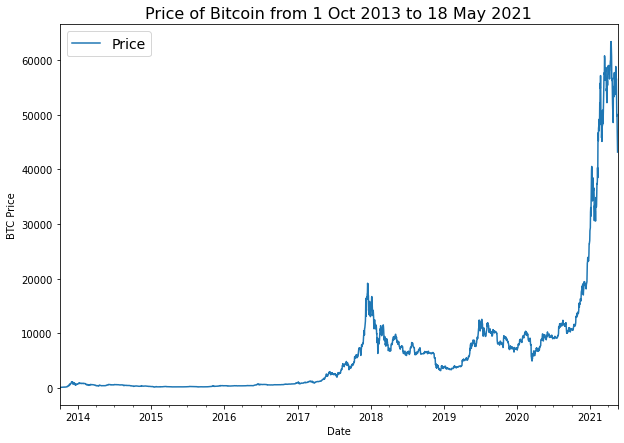

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates and not strings
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

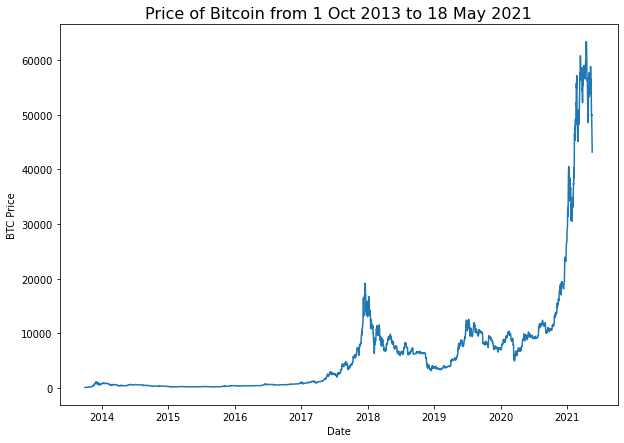

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")

## Format data part 1: Create train and test sets of our time series data


### Creating train and test sets with time series data (the WRONG way!)


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

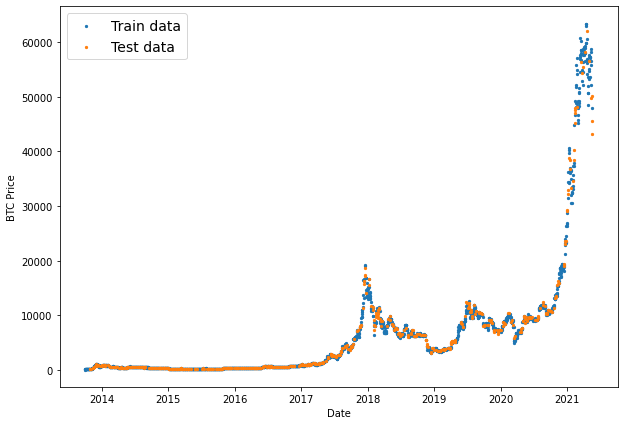

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create train & test sets for time series (the right way)


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test -these can be altered

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

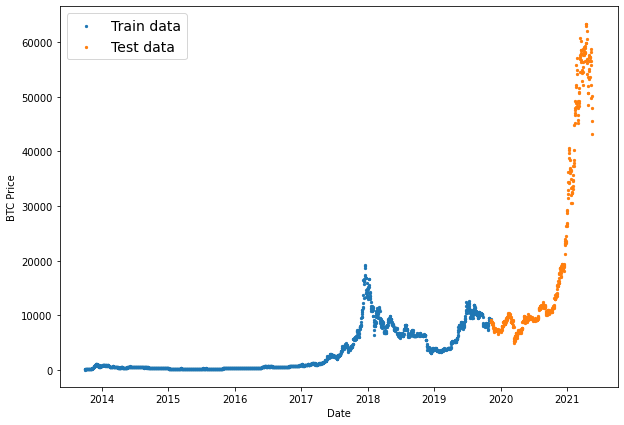

In [ ]:
# Let's plot right train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps ( a series of points in time) against values (a series of values across timesteps)

  Parameters
  ----------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (setting a value will index from start of timesteps & values)
  end: where to end the plot (similar to start but for the end)
  label: label to show on plot about values, default None
  """

  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

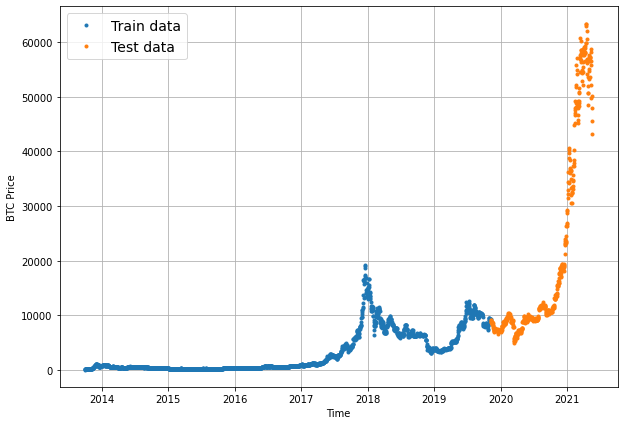

In [ ]:
# Test plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we *can* build *almost any* kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, **horizon** and **window**. 
  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

> 🔑 **Note:** To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed. 

## Model 0: Naïve forecast (baseline)

As usual, let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the [naïve forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$ 

In English: 
> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep).

Sound simple?

Maybe not.

In an open system (like a stock market or crypto market), you'll often find beating the naïve forecast with *any* kind of model is quite hard.

> 🔑 **Note:** For the sake of this notebook, an **open system** is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a **closed system** the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in **open systems** is generally quite poor.

In [ ]:
# Create Naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

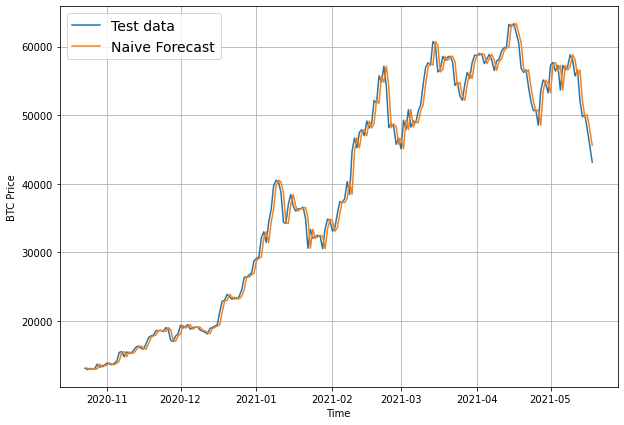

In [ ]:
# Plot Naive Forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train_data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - Mean abs error
* MSE - Mean sq error
* RMSE - Root mean sq error
* MAPE/sMAPE - (symmetric) mean abs percentage error
* MASE - mean abs scaled error

For all above metrics, **lower is better**.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

In [ ]:
import tensorflow as tf
import numpy as np



In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
# test MASE( this value should = 1 or be ery close to 1 with the naive forecost)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

You'll notice the version of MASE above doesn't take in the training values like sktime's `mae_loss()`. In our case, we're comparing the MAE of our predictions on the test to the MAE of the naïve forecast on the test set.

In practice, if we've created the function correctly, the naïve model should achieve an MASE of 1 (or very close to 1). Any model worse than the naïve forecast will achieve an MASE of >1 and any model better than the naïve forecast will achieve an MASE of <1.

Let's put each of our different evaluation metrics together into a function.

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Wow, looks good 😎!

Now try it out!

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecast

In this notebook, we're focused on TensowFlow and deep learning models

That being said, there are many other kinds of models you may want to look into for building baselines/performing forecasts.

Some of them may even beat our best performing models in this notebook, however, I'll leave trying them out for extra-curriculum.


-  Moving average	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
-  ARIMA (Autoregression Integrated Moving Average)	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
-  sktime (Scikit-Learn for time series)	https://github.com/alan-turing-institute/sktime
-  TensorFlow Decision Forests (random forest, gradient boosting trees)	https://www.tensorflow.org/decision_forests
-  Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats
-  LinkedIn Greykite (flexible, intuitive and fast forecasts)	https://github.com/linkedin/greykite

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] - > Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> , Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> , Label: 8


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python `for` loops, but for large series that'd be quite slow.

To speed things up, let's use NumPy's array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps.
  - For example:
  ```
  [[0, 1, 2, 3, 4, 5, 6],
  [1, 2, 3, 4, 5, 6, 7],
  [2, 3, 4, 5, 6, 7, 8]]
  ```
3. Uses the 2D array of multiple window steps (from step 2) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the windows steps into windows with a specifed horizon.

> ** RESOURCE **  The function we're about to create was adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


There is a tensorflow function that does the same as above. Replicate!

> https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # This willd efault to 80% train and 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modeling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs best on epoch 55 ( but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modeling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window= 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and relu activation
* Output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously used 32, dataset is smaller this time)
* 100 epochs

Picked out of experimentation

* **Hyperparameters** = values a machine learning practitioner can adjust themselves.
* **Parameters** = values a model learns on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for reproducible results
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense")

# 2. Compile model

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 90ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 49ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9992 - val_mae: 1005.9992 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 49ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5938 - val_loss: 923.2863 - val_mae: 923.2863 - val_mse: 2868221.2500
Epoch 4/100
18/18 [==============================] - 1s 63ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.7500
Epoch 5/100
18/18 [==============================] - 1s 58ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.8125 - val_loss: 895.2236 - val_mae: 895.2236 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 61ms/step - loss: 158.5

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9752 - mae: 585.9752 - mse: 1197801.2500


[585.9752197265625, 585.9752197265625, 1197801.25]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.8750


[568.9510498046875, 568.9510498046875, 1171743.875]

## Make forecasts with a model (on the test dataset)

To make forecasts on the test dataset (note: not actual forecasts... psuedo forecasts because actual forecasts are into the future).

Let's write a function to:
1. Take in trained model
2. Takes in some input data (same kind as model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.713, 8769.888, 9015.712, 8795.52 , 8723.812, 8730.111,
        8691.953, 8502.056, 8460.962, 8516.548], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.9,
 'rmse': 1082.4712}

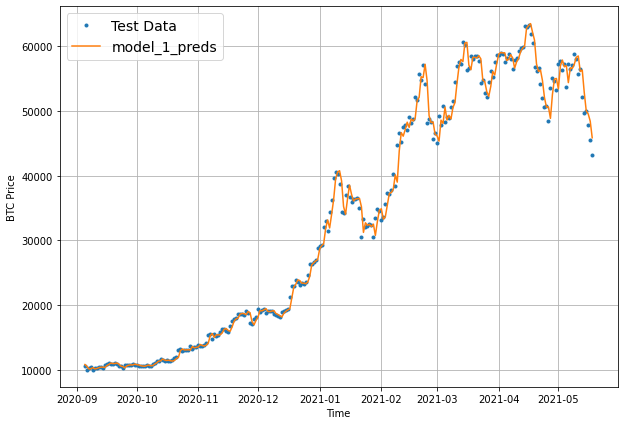

In [ ]:
# Let's plot our model 1 preds
offset = 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label='model_1_preds')

## Model 2 - Same as model 1 but with (window=30, horizon=1)

In [ ]:
HORIZON = 1 # predict one step at time (one day of BTC)
WINDOW_SIZE = 30 # Use 30 timesteps in past

In [ ]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.2)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
# Create model 2

# set random seed for reproducibility
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.6250


[608.9619750976562, 608.9619750976562, 1281440.625]

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.6250


[608.9619750976562, 608.9619750976562, 1281440.625]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
# Evaluate results for model 2 preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 608.962,
 'mape': 2.7693412,
 'mase': 1.0644715,
 'mse': 1281440.6,
 'rmse': 1132.0073}

In [ ]:
naive_results, model_1_results # model_2 not better... :[

({'mae': 567.9802,
  'mape': 2.516525,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362},
 {'mae': 568.95105,
  'mape': 2.5448983,
  'mase': 0.9994894,
  'mse': 1171743.9,
  'rmse': 1082.4712})

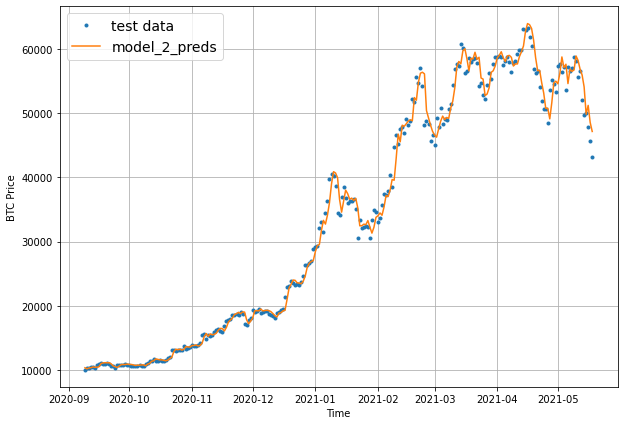

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Same as model 1, but with Window=30, Horizon=7

In [ ]:
WINDOW_SIZE=30
HORIZON = 7

In [ ]:
# Create window/label sets
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows.shape, full_labels.shape

((2751, 30), (2751, 7))

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [ ]:
# Create model_3

# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON) # activation=None (or linear.. same thing)
], name="model_3_dense")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1340.4274 - mae: 1340.4274 - mse: 5758703.5000


[1340.4273681640625, 1340.4273681640625, 5758703.5]

In [ ]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1234.8838 - mae: 1234.8838 - mse: 5393733.5000


[1234.8837890625, 1234.8837890625, 5393733.5]

In [ ]:
# Make preds
model_3_preds = make_preds(model_3,
                           input_data=test_windows)


In [ ]:
test_labels.shape, model_3_preds.shape

((551, 7), TensorShape([551, 7]))

In [ ]:
# Evaluate preds
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  561.22504 ,   301.9714  ,   297.9477  ,   413.84305 ,
          445.20914 ,   540.59717 ,   527.2284  ,   441.84564 ,
          498.77365 ,   639.19226 ,   803.132   ,   731.72614 ,
          678.6171  ,   797.1857  ,   575.334   ,   280.21136 ,
          239.92166 ,   246.152   ,   276.387   ,   285.75488 ,
          118.8042  ,   135.45549 ,   191.11852 ,   251.82582 ,
          170.28928 ,   154.2002  ,   107.244835,    97.66267 ,
          111.26409 ,   139.854   ,   269.1739  ,   369.812   ,
          270.48096 ,   263.1211  ,   247.72252 ,   255.50523 ,
          298.48172 ,   245.26395 ,   243.13072 ,   255.7583  ,
          416.62576 ,   150.97021 ,    94.16581 ,   101.62012 ,
           93.7696  ,    86.753136,    73.2793  ,    79.045204,
           89.541084,    93.11977 ,   106.798546,   141.09578 ,
          178.73668 ,   145.46994 ,   256.4566  ,   392.8164  ,
          560.91174 ,   552.8187  ,   536.1548  ,   535.2687  ,
          448.70453 ,   267.23297

## Make our evaluation function work for larger horizons

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1234.8838,
 'mape': 5.4874983,
 'mase': 2.1974063,
 'mse': 5393734.0,
 'rmse': 1419.1362}

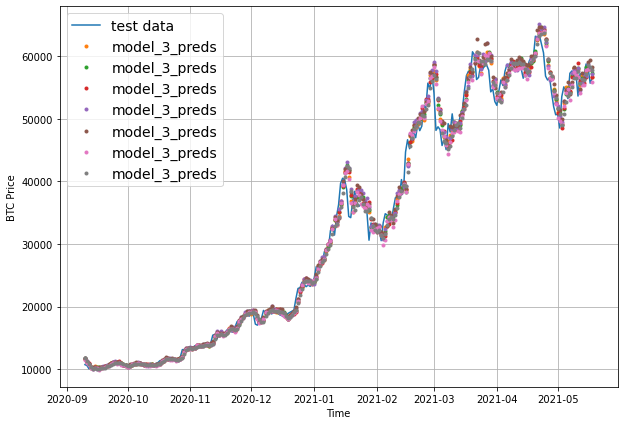

In [ ]:
# Make a plot
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

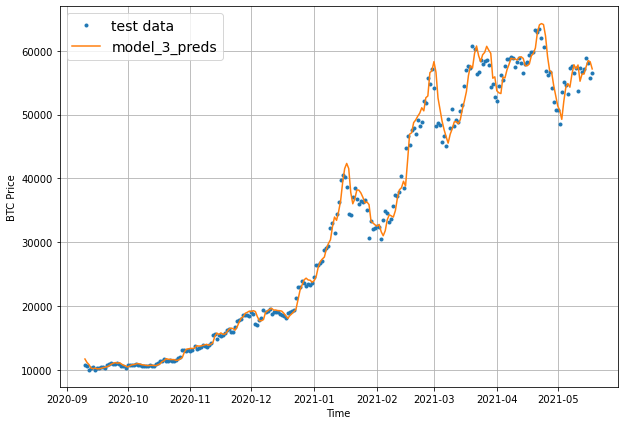

In [ ]:
# Make a plot
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

## Which of our models is performing the best so far?

Compare the models created!~

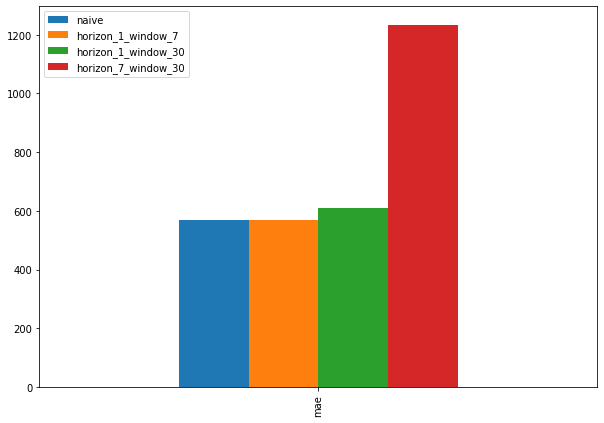

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

> *NOTE*: The naive results are so good because of the autocorrelation present in the data. If a time series has autocorrelation, it means the value at t+1 is very similar to the value at t. Basically, if predicting for tomorrow, the value is very close to today. In many machine learning models, the model will basically start using t for t+1 as the prediction. That is why the naive model (which literally uses t for t+1) is so good in this example.

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day of BTC prices
WINDOW_SIZE = 7 # use prev week of data for prediction

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test split
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use Conv1D layer, we need an input shape of : `(batch_size, timesteps, input_dim)`

However, data isn't in that shape yet.

In [ ]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add extra dimension for `input_dim`

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Conv1D(128, kernel_size=5, padding="causal", activation="relu"),
                               layers.Dense(HORIZON)
], name="model_4_conv1d")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 10ms/step - loss: 610.1540


610.1539916992188

In [ ]:
# Load in best performing and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.8284301757812

In [ ]:
# Make preds
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
# Eval preds
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.9,
 'rmse': 1082.4712}

## Model 5: LSTM

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
tf.random.set_seed(42)

# Create LSTM model using Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])



Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2534.5144 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 121ms/step - loss: 2323.6077 - val_loss: 9222.6221
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 905.2981 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 695.4739 - val_loss: 1486.0378
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 270.4786INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 237.3842 - val_loss: 1298.9087
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5338INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 181.9185 - val_loss: 966.6432
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4023 - val_loss: 970.9296
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 173.3822 - val_loss: 981.0975
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 182.3532INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 171.9762 - val_loss: 921.8434
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 164.1852INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 165.5515 - val_loss: 900.0497
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 161.7419INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 160.4305 - val_loss: 853.6299
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 168.6475 - val_loss: 931.5431
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 169.2183 - val_loss: 926.0713
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 166.3748 - val_loss: 916.8346
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 166.8522 - val_loss: 909.6310
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 161.6482 - val_loss: 866.7496
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 155.9960 - val_loss: 896.1780
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 159.4309 - val_loss: 882.4391
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 157.7812 - val_loss: 956.9371
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 15

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 150.1062 - val_loss: 844.7767
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 149.1968 - val_loss: 861.0685
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 147.1761 - val_loss: 848.1241
Epoch 25/100
12/18 [===================>..........] - ETA: 0s - loss: 152.1060INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 145.5848 - val_loss: 840.6231
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 148.1645INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 145.0945 - val_loss: 813.1295
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 149.4126INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 143.2227 - val_loss: 805.5842
Epoch 28/100
10/18 [===============>..............] - ETA: 0s - loss: 147.7898INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 141.6531 - val_loss: 785.5984
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 140.8680 - val_loss: 801.3979
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 141.3804 - val_loss: 791.8160
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 138.2825INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 138.0144 - val_loss: 768.1625
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 138.1926INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 135.9883 - val_loss: 764.0204
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 136.6867 - val_loss: 791.4828
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 142.0320INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 136.4118 - val_loss: 750.6531
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 133.7257 - val_loss: 754.5988
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 133.3797INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 133.4312 - val_loss: 734.5640
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 131.2189 - val_loss: 747.5995
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 138.4018INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 129.7771 - val_loss: 718.2686
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 131.0688INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 129.4270 - val_loss: 716.9465
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 130.6303 - val_loss: 728.0188
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 130.7772INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 127.6953 - val_loss: 701.7618
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 126.2242 - val_loss: 706.0325
Epoch 43/100
12/18 [===================>..........] - ETA: 0s - loss: 122.1359INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 125.7488 - val_loss: 693.8345
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 119.9671INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 125.5652 - val_loss: 689.3698
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 120.8933INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 123.4030 - val_loss: 682.0648
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 130.1366INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 124.5756 - val_loss: 679.0645
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 122.3864 - val_loss: 700.8399
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 119.6655INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 122.4737 - val_loss: 676.0283
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 122.0582 - val_loss: 690.3026
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 124.1240 - val_loss: 714.4885
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 125.1230 - val_loss: 778.5692
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 132.0012INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 123.6763 - val_loss: 660.4346
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 118.8036INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 119.8259 - val_loss: 659.2103
Epoch 54/100
12/18 [===================>..........] - ETA: 0s - loss: 117.4700INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 120.3732 - val_loss: 654.3164
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 124.9175INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 118.6429 - val_loss: 648.6450
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 122.4215INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 120.1063 - val_loss: 645.4896
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 123.7777 - val_loss: 680.8215
Epoch 58/100
12/18 [===================>..........] - ETA: 0s - loss: 118.0383INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 118.7787 - val_loss: 641.7518
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 114.4179INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 117.9966 - val_loss: 641.0961
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3239 - val_loss: 643.4174
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 118.6151 - val_loss: 696.0721
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 122.4420 - val_loss: 749.9855
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 123.8672 - val_loss: 660.2910
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0016 - val_loss: 687.4307
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 121.8536INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 119.8755 - val_loss: 632.8752
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1110 - val_loss: 640.7438
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 114.8851INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 117.9292 - val_loss: 626.2725
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 116.3970INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 117.1456 - val_loss: 625.1245
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3027 - val_loss: 625.7104
Epoch 70/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.9540INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 114.9086 - val_loss: 621.8661
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 115.1822 - val_loss: 654.4707
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3393 - val_loss: 632.7345
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7310 - val_loss: 627.1373
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2199 - val_loss: 625.5247
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5961 - val_loss: 647.6739
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 113.9051INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 114.7675 - val_loss: 617.0222
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 116.8673 - val_loss: 666.9280
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1996 - val_loss: 627.6133
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 111.1984INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 113.5704 - val_loss: 611.2637
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2127 - val_loss: 621.4436
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3850 - val_loss: 631.9078
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 123.1307INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 116.0263 - val_loss: 610.8793
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.4978 - val_loss: 631.0351
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4766 - val_loss: 620.5226
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3218 - val_loss: 640.3288
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0620 - val_loss: 614.5500
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 116.9279INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 112.4946 - val_loss: 609.2250
Epoch 88/100
12/18 [===================>..........] - ETA: 0s - loss: 115.7807INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 112.1963 - val_loss: 603.8983
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1124 - val_loss: 629.1746
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 116.6988 - val_loss: 645.2277
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3321 - val_loss: 626.2292
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3265 - val_loss: 612.6552
Epoch 93/100
12/18 [===================>..........] - ETA: 0s - loss: 115.3548INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 113.0708 - val_loss: 599.9893
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2166 - val_loss: 600.3155
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 108.2463INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 111.1020 - val_loss: 598.2369
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3853 - val_loss: 605.4749
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6455 - val_loss: 625.0032
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1201 - val_loss: 600.1553
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9818 - val_loss: 598.9257
Epoch 100/100
12/18 [===================>..........] - ETA: 0s - loss: 120.7395INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 112.5498 - val_loss: 597.4623


In [ ]:
# Evaluate using best model
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 597.4624


597.46240234375

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8992.637, 8824.648, 9010.125, 8848.681, 8743.077], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 597.46234,
 'mape': 2.6910973,
 'mase': 1.0495758,
 'mse': 1275416.0,
 'rmse': 1129.3431}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.9,
 'rmse': 1082.4712}

> **NOTE**: Just because you *CAN* use a deep learning neural network... does not mean it will be better or more practical for use. Sometimes something basic (like naive-bayes) can perform MUCH better with MUCH less resources.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Elon Musk tweeted on that day...

* Day 1 - 0
* Day 2 - 1
* Day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving



In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # January 3, 2009 -- not in our dataset (our data starts in October 2013)
block_reward_2 = 25 # November 8, 2012
block_reward_3 = 12.5 # July 9, 2016
block_reward_4 = 6.25 # May 18, 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create date ranges of where specific block_reward should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# add in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


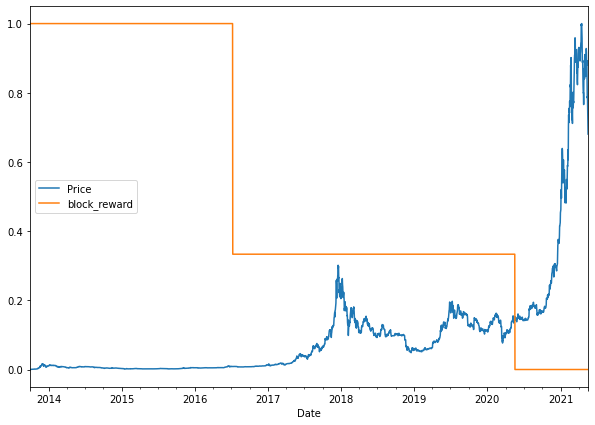

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with Pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data now, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the BTC historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```


In [ ]:
# Create X (windows) and y (horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.00,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.00,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.00,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.00,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.00,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2021-05-14,6.25,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,6.25,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,6.25,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


In [ ]:
y

Date
2013-10-08      123.032997
2013-10-09      124.049004
2013-10-10      125.961159
2013-10-11      125.279663
2013-10-12      125.927498
                  ...     
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Price, Length: 2780, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Create model

model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_6_Dense_Multivariate")

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 2853.4023 - mae: 2853.4023 - mse: 16863842.0000INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 1234.6805 - mae: 1234.6805 - mse: 5282006.0000 - val_loss: 2061.9075 - val_mae: 2061.9075 - val_mse: 11377606.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 337.7052 - mae: 337.7052 - mse: 601896.3750INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 351.5054 - mae: 351.5054 - mse: 499358.0312 - val_loss: 1908.6731 - val_mae: 1908.6731 - val_mse: 8719442.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.1732 - mae: 249.1732 - mse: 214883.3906INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 235.4153 - mae: 235.4153 - mse: 276006.8125 - val_loss: 1329.0583 - val_mae: 1329.0583 - val_mse: 4991872.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 271.0340 - mae: 271.0340 - mse: 308825.2500INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 208.6112 - mae: 208.6112 - mse: 219502.6875 - val_loss: 1102.1342 - val_mae: 1102.1342 - val_mse: 3934655.5000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 196.5770 - mae: 196.5770 - mse: 204309.3594 - val_loss: 1107.8473 - val_mae: 1107.8473 - val_mse: 3822058.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3367 - mae: 145.3367 - mse: 79556.4922INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 187.2244 - mae: 187.2244 - mse: 185754.2188 - val_loss: 1036.1720 - val_mae: 1036.1720 - val_mse: 3602706.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.5106 - mae: 231.5106 - mse: 367153.1250INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 182.0246 - mae: 182.0246 - mse: 177482.7500 - val_loss: 1019.2927 - val_mae: 1019.2927 - val_mse: 3334209.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5176 - mae: 151.5176 - mse: 94419.4531INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 175.7059 - mae: 175.7059 - mse: 166085.1875 - val_loss: 977.8487 - val_mae: 977.8487 - val_mse: 3114359.2500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1690 - mae: 142.1690 - mse: 92251.8984INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 170.1784 - mae: 170.1784 - mse: 157931.9531 - val_loss: 954.4036 - val_mae: 954.4036 - val_mse: 2930253.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 177.8448 - mae: 177.8448 - mse: 219206.5781INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 164.4430 - mae: 164.4430 - mse: 149624.9219 - val_loss: 913.5146 - val_mae: 913.5146 - val_mse: 2725003.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3627 - mae: 171.3627 - mse: 133984.9219INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 158.6892 - mae: 158.6892 - mse: 137497.7188 - val_loss: 874.2505 - val_mae: 874.2505 - val_mse: 2503843.0000
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0429 - mae: 147.0429 - mse: 97438.9688INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 152.0732 - mae: 152.0732 - mse: 128314.7891 - val_loss: 861.0416 - val_mae: 861.0416 - val_mse: 2380360.7500
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 151.1057 - mae: 151.1057 - mse: 126204.9062 - val_loss: 886.1204 - val_mae: 886.1204 - val_mse: 2378219.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 152.2399 - mae: 152.2399 - mse: 107309.0000INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 147.5482 - mae: 147.5482 - mse: 118020.3516 - val_loss: 837.8613 - val_mae: 837.8613 - val_mse: 2199053.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6368 - mae: 146.6368 - mse: 79022.4375INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 142.3497 - mae: 142.3497 - mse: 113288.9766 - val_loss: 794.4786 - val_mae: 794.4786 - val_mse: 2039430.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8471 - mae: 125.8471 - mse: 68738.1250INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 137.5206 - mae: 137.5206 - mse: 106858.8828 - val_loss: 778.4050 - val_mae: 778.4050 - val_mse: 1954906.7500
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1490 - mae: 125.1490 - mse: 75813.5547INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 135.8190 - mae: 135.8190 - mse: 104154.0078 - val_loss: 772.4529 - val_mae: 772.4529 - val_mse: 1901520.2500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 145.6097 - mae: 145.6097 - mse: 99865.9062INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 134.8562 - mae: 134.8562 - mse: 102955.3828 - val_loss: 747.4801 - val_mae: 747.4801 - val_mse: 1804913.1250
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 130.3347 - mae: 130.3347 - mse: 96741.8438 - val_loss: 761.0552 - val_mae: 761.0552 - val_mse: 1809536.5000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2514 - mae: 145.2514 - mse: 111915.7344INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 128.6775 - mae: 128.6775 - mse: 93855.6953 - val_loss: 701.8977 - val_mae: 701.8977 - val_mse: 1664375.2500
Epoch 21/100
16/18 [=========================>....] - ETA: 0s - loss: 128.9298 - mae: 128.9298 - mse: 92792.1875 INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 129.5576 - mae: 129.5576 - mse: 95792.0938 - val_loss: 691.0127 - val_mae: 691.0127 - val_mse: 1604252.8750
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6308 - mae: 176.6308 - mse: 179691.2969INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 125.8060 - mae: 125.8060 - mse: 90966.0703 - val_loss: 684.4120 - val_mae: 684.4120 - val_mse: 1561598.8750
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 125.5263 - mae: 125.5263 - mse: 90267.1328 - val_loss: 692.1295 - val_mae: 692.1295 - val_mse: 1560175.7500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1221 - mae: 134.1221 - mse: 83312.5938INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 122.4765 - mae: 122.4765 - mse: 86726.7812 - val_loss: 674.2214 - val_mae: 674.2214 - val_mse: 1504522.0000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.5674 - mae: 133.5674 - mse: 74889.4922INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 121.1171 - mae: 121.1171 - mse: 84265.1797 - val_loss: 669.6443 - val_mae: 669.6443 - val_mse: 1546641.3750
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2623 - mae: 127.2623 - mse: 87325.4219 - val_loss: 690.0407 - val_mae: 690.0407 - val_mse: 1606596.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3231 - mae: 180.3231 - mse: 150015.3750INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 124.6204 - mae: 124.6204 - mse: 87496.1562 - val_loss: 643.9725 - val_mae: 643.9725 - val_mse: 1437326.3750
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2544 - mae: 118.2544 - mse: 81311.5938 - val_loss: 656.2766 - val_mae: 656.2766 - val_mse: 1431099.3750
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8150 - mae: 109.8150 - mse: 76775.0938INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 119.6374 - mae: 119.6374 - mse: 82266.8672 - val_loss: 633.4545 - val_mae: 633.4545 - val_mse: 1375091.6250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2604 - mae: 130.2604 - mse: 91511.5938INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 119.5001 - mae: 119.5001 - mse: 81478.4141 - val_loss: 625.3953 - val_mae: 625.3953 - val_mse: 1360550.3750
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5633 - mae: 114.5633 - mse: 78351.5078 - val_loss: 668.5062 - val_mae: 668.5062 - val_mse: 1448342.5000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3793 - mae: 121.3793 - mse: 82826.2969INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 116.9750 - mae: 116.9750 - mse: 80914.8672 - val_loss: 617.1060 - val_mae: 617.1060 - val_mse: 1328562.0000
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2439 - mae: 115.2439 - mse: 78368.8125 - val_loss: 649.0987 - val_mae: 649.0987 - val_mse: 1390663.1250
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5187 - mae: 114.5187 - mse: 78831.3438 - val_loss: 632.1377 - val_mae: 632.1377 - val_mse: 1383321.5000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 112.6760 - mae: 112.6760 - mse: 67407.0938INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 113.6357 - mae: 113.6357 - mse: 76610.7734 - val_loss: 607.4173 - val_mae: 607.4173 - val_mse: 1299839.2500
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2605 - mae: 115.2605 - mse: 77254.8203 - val_loss: 626.4316 - val_mae: 626.4316 - val_mse: 1328737.2500
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7286 - mae: 141.7286 - mse: 119278.2344INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 113.7021 - mae: 113.7021 - mse: 76909.3203 - val_loss: 606.2318 - val_mae: 606.2318 - val_mse: 1299941.6250
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 107.1736 - mae: 107.1736 - mse: 71145.6719INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 111.4061 - mae: 111.4061 - mse: 75382.8672 - val_loss: 603.2921 - val_mae: 603.2921 - val_mse: 1290359.3750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4214 - mae: 127.4214 - mse: 104832.4375INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 112.7722 - mae: 112.7722 - mse: 75144.9453 - val_loss: 596.0060 - val_mae: 596.0060 - val_mse: 1267989.1250
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2578 - mae: 100.2578 - mse: 92350.2812INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 110.5418 - mae: 110.5418 - mse: 73266.8984 - val_loss: 593.2171 - val_mae: 593.2171 - val_mse: 1259326.1250
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8671 - mae: 110.8671 - mse: 73493.2422 - val_loss: 609.1066 - val_mae: 609.1066 - val_mse: 1298277.5000
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7249 - mae: 115.7249 - mse: 78316.4531 - val_loss: 607.4874 - val_mae: 607.4874 - val_mse: 1271582.3750
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3313 - mae: 111.3313 - mse: 72553.7656 - val_loss: 606.2032 - val_mae: 606.2032 - val_mse: 1287465.7500
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 65.3245 - mae: 65.3245 - mse: 16110.8096INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 109.7027 - mae: 109.7027 - mse: 72483.3594 - val_loss: 586.1216 - val_mae: 586.1216 - val_mse: 1236946.6250
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8748 - mae: 107.8748 - mse: 72189.5078 - val_loss: 593.8448 - val_mae: 593.8448 - val_mse: 1256012.3750
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8641 - mae: 109.8641 - mse: 72053.3203 - val_loss: 586.4579 - val_mae: 586.4579 - val_mse: 1224364.1250
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3586 - mae: 112.3586 - mse: 74881.6562 - val_loss: 655.4484 - val_mae: 655.4484 - val_mse: 1368205.3750
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1614 - mae: 109.1614 - mse: 72981.2344 - val_loss: 598.7231 - val_mae: 598.7231 - val_mse: 1244141.1250
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3029 - mae: 109.3029 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 110.4068 - mae: 110.4068 - mse: 73627.0078 - val_loss: 575.7750 - val_mae: 575.7750 - val_mse: 1197730.6250
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - mae: 108.6609 - mse: 71261.1328 - val_loss: 785.9762 - val_mae: 785.9762 - val_mse: 1798982.0000
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 124.9823 - mae: 124.9823 - mse: 82843.3594 - val_loss: 670.3788 - val_mae: 670.3788 - val_mse: 1435155.1250
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8591 - mae: 112.8591 - mse: 71915.3984 - val_loss: 580.2877 - val_mae: 580.2877 - val_mse: 1201587.6250
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2513 - mae: 107.2513 - mse: 70587.5078 - val_loss: 597.5089 - val_mae: 597.5089 - val_mse: 1251076.7500
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2322 - mae: 109.2322 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 112.0475 - mae: 112.0475 - mse: 73420.1797 - val_loss: 575.5544 - val_mae: 575.5544 - val_mse: 1191944.1250
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2831 - mae: 111.2831 - mse: 71301.0312 - val_loss: 590.7808 - val_mae: 590.7808 - val_mse: 1225398.0000
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7917 - mae: 106.7917 - mse: 69382.4609 - val_loss: 586.8846 - val_mae: 586.8846 - val_mse: 1218029.0000
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2987 - mae: 112.2987 - mse: 70631.5859 - val_loss: 696.5298 - val_mae: 696.5298 - val_mse: 1492199.0000
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.7808 - mae: 124.7808 - mse: 81109.6094 - val_loss: 698.5273 - val_mae: 698.5273 - val_mse: 1498615.2500
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 119.3443 - mae: 119.3443 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 106.7711 - mae: 106.7711 - mse: 70055.2656 - val_loss: 573.6143 - val_mae: 573.6143 - val_mse: 1185169.0000
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2485 - mae: 110.2485 - mse: 71589.1562 - val_loss: 618.8953 - val_mae: 618.8953 - val_mse: 1289602.7500
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5330 - mae: 105.5330 - mse: 69883.3047 - val_loss: 574.9455 - val_mae: 574.9455 - val_mse: 1189283.2500
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3177 - mae: 107.3177 - mse: 69894.7422 - val_loss: 606.1971 - val_mae: 606.1971 - val_mse: 1240846.5000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8084 - mae: 107.8084 - mse: 70983.0859 - val_loss: 582.2407 - val_mae: 582.2407 - val_mse: 1206272.7500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.6437 - mae: 83.6437 - mse: 62

INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 107.2528 - mae: 107.2528 - mse: 69628.3516 - val_loss: 571.8566 - val_mae: 571.8566 - val_mse: 1180512.6250
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2309 - mae: 106.2309 - mse: 69009.0156 - val_loss: 572.2827 - val_mae: 572.2827 - val_mse: 1174658.6250
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8568 - mae: 105.8568 - mse: 70072.8438 - val_loss: 596.5466 - val_mae: 596.5466 - val_mse: 1236696.8750
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8419 - mae: 107.8419 - mse: 70822.3047 - val_loss: 577.2398 - val_mae: 577.2398 - val_mse: 1181263.1250
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0620 - mae: 95.0620 - mse: 44754.0234INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 105.1100 - mae: 105.1100 - mse: 68809.2344 - val_loss: 568.4897 - val_mae: 568.4897 - val_mse: 1169003.7500
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1867 - mae: 114.1867 - mse: 75576.8359 - val_loss: 592.5615 - val_mae: 592.5615 - val_mse: 1228616.0000
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9631 - mae: 107.9631 - mse: 70494.3125 - val_loss: 651.6220 - val_mae: 651.6220 - val_mse: 1362900.2500
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6690 - mae: 109.6690 - mse: 71213.1719 - val_loss: 568.9340 - val_mae: 568.9340 - val_mse: 1170230.8750
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8219 - mae: 105.8219 - mse: 69465.5938 - val_loss: 571.5331 - val_mae: 571.5331 - val_mse: 1169861.6250
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8628 - mae: 104.8628 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_Dense_Multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 106.1837 - mae: 106.1837 - mse: 69945.1250 - val_loss: 568.0361 - val_mae: 568.0361 - val_mse: 1166216.0000
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8590 - mae: 115.8590 - mse: 71867.6016 - val_loss: 639.6246 - val_mae: 639.6246 - val_mse: 1311233.2500


In [ ]:
# Evaluate
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.6246 - mae: 639.6246 - mse: 1311233.3750


[639.6245727539062, 639.6245727539062, 1311233.375]

In [ ]:
# Load best model and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_Dense_Multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.0361 - mae: 568.0361 - mse: 1166216.0000


[568.0360717773438, 568.0360717773438, 1166216.0]

In [ ]:
# Make preds
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8849.693 , 8777.459 , 9053.712 , 8753.832 , 8731.5205, 8777.638 ,
       8673.611 , 8509.444 , 8475.512 , 8533.936 ], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 568.036,
 'mape': 2.546599,
 'mase': 0.99788195,
 'mse': 1166216.0,
 'rmse': 1079.9148}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.9,
 'rmse': 1082.4712}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

Could try to do a multi-input model to have the bitcoin prices and the block rewards as separate inputs instead of being bundled together. Reference model 4 of 9_NLP for an example of this.

## Model 7: N-BEATS Algorithm

Now time to build the biggest time series forecasting model so far!

More specifically, it is time to replicate the algorithm in the following paper in figure 1 : https://arxiv.org/pdf/2104.05522.pdf

* This will allow practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially, get state of the art results on our problem!

### Building and testing the N-BEATS block layer

The N-Beats block layer does not exist in TensorFlow, so it must be created.

To create custom layers and models in TensorFlow, we can use subclassing:

https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # **kwargs argument takes care of all the arguments of parent class (tf.keras.layers.Layer)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers, each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast


Let's test our NBeatsBlock class
To do this, we'll make some dummy inputs and outputs


In [ ]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)

# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# There are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960155  0.3251205  -0.8428683  -0.69389856 -0.31720546 -0.56987345
 -0.6396661 ]
Forecast: 1.0071648359298706


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible, we're going to be adhering to the perfomant data pipeline steps in the tf.data guide:

https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can create our N-Beats model, we need two layers for residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections, see wikipedia for Residual neural network: https://en.wikipedia.org/wiki/Residual_neural_network

and here: https://paperswithcode.com/method/resnet

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract layer
subtracted = layers.subtract([tensor_1, tensor_2])

# Add layer
added = layers.add([tensor_1, tensor_2])

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

### Building, compiling, and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer used `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecast for the model with the layer created in step 1.
4. Use for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses, but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks: 
  * Early Stopping - to prevent overfitting ( will stop once it stops improving)
  * Reduce LR on Plateau - if a model stops improving, try lowering learning rate to reduce the amount it updates its weights each time (takes smaller steps towards best performance).


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Set up an instance of NBeatsBlock layer
dummy_nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                       theta_size=THETA_SIZE,
                                       horizon=HORIZON,
                                       n_neurons=N_NEURONS,
                                       n_layers=N_LAYERS,
                                       name="InitialBlock")

# 2. Create an input layer for the N-BEATS stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = dummy_nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # First stack is already created in step 3... so only need to iterate 29 times as opposed to full 30 (N_STACKS)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name =f"NBeatsBlock_{i}"
  )(residuals)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

# 8. Compile model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model for 5000 epochs and use callbacks EarlyStopping and ReduceLROnPlateau
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 766: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1083: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1183: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 2s, sys: 4.87 s, total: 3min 7s
Wall time: 3min 20s


In [ ]:
# Evaluate
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 573.9108


573.9108276367188

In [ ]:
# Make predictions
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.825, 8775.297, 9025.343, 8751.18 , 8759.819, 8747.838,
       8653.091, 8498.387, 8476.177, 8510.117], dtype=float32)>

In [ ]:
# Evaluate model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.9108,
 'mape': 2.6094503,
 'mase': 1.0082023,
 'mse': 1168969.5,
 'rmse': 1081.189}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.9,
 'rmse': 1082.4712}

Welp... even with all that coding and a hand-crafted network... N-BEATS still isn't performing as well as `model_1` or the original naive forecast.

This shows the power of smaller networks as well as the fact not all large models are necessarily better for certain types of data.

### Plot the N-BEATS architecture we've created

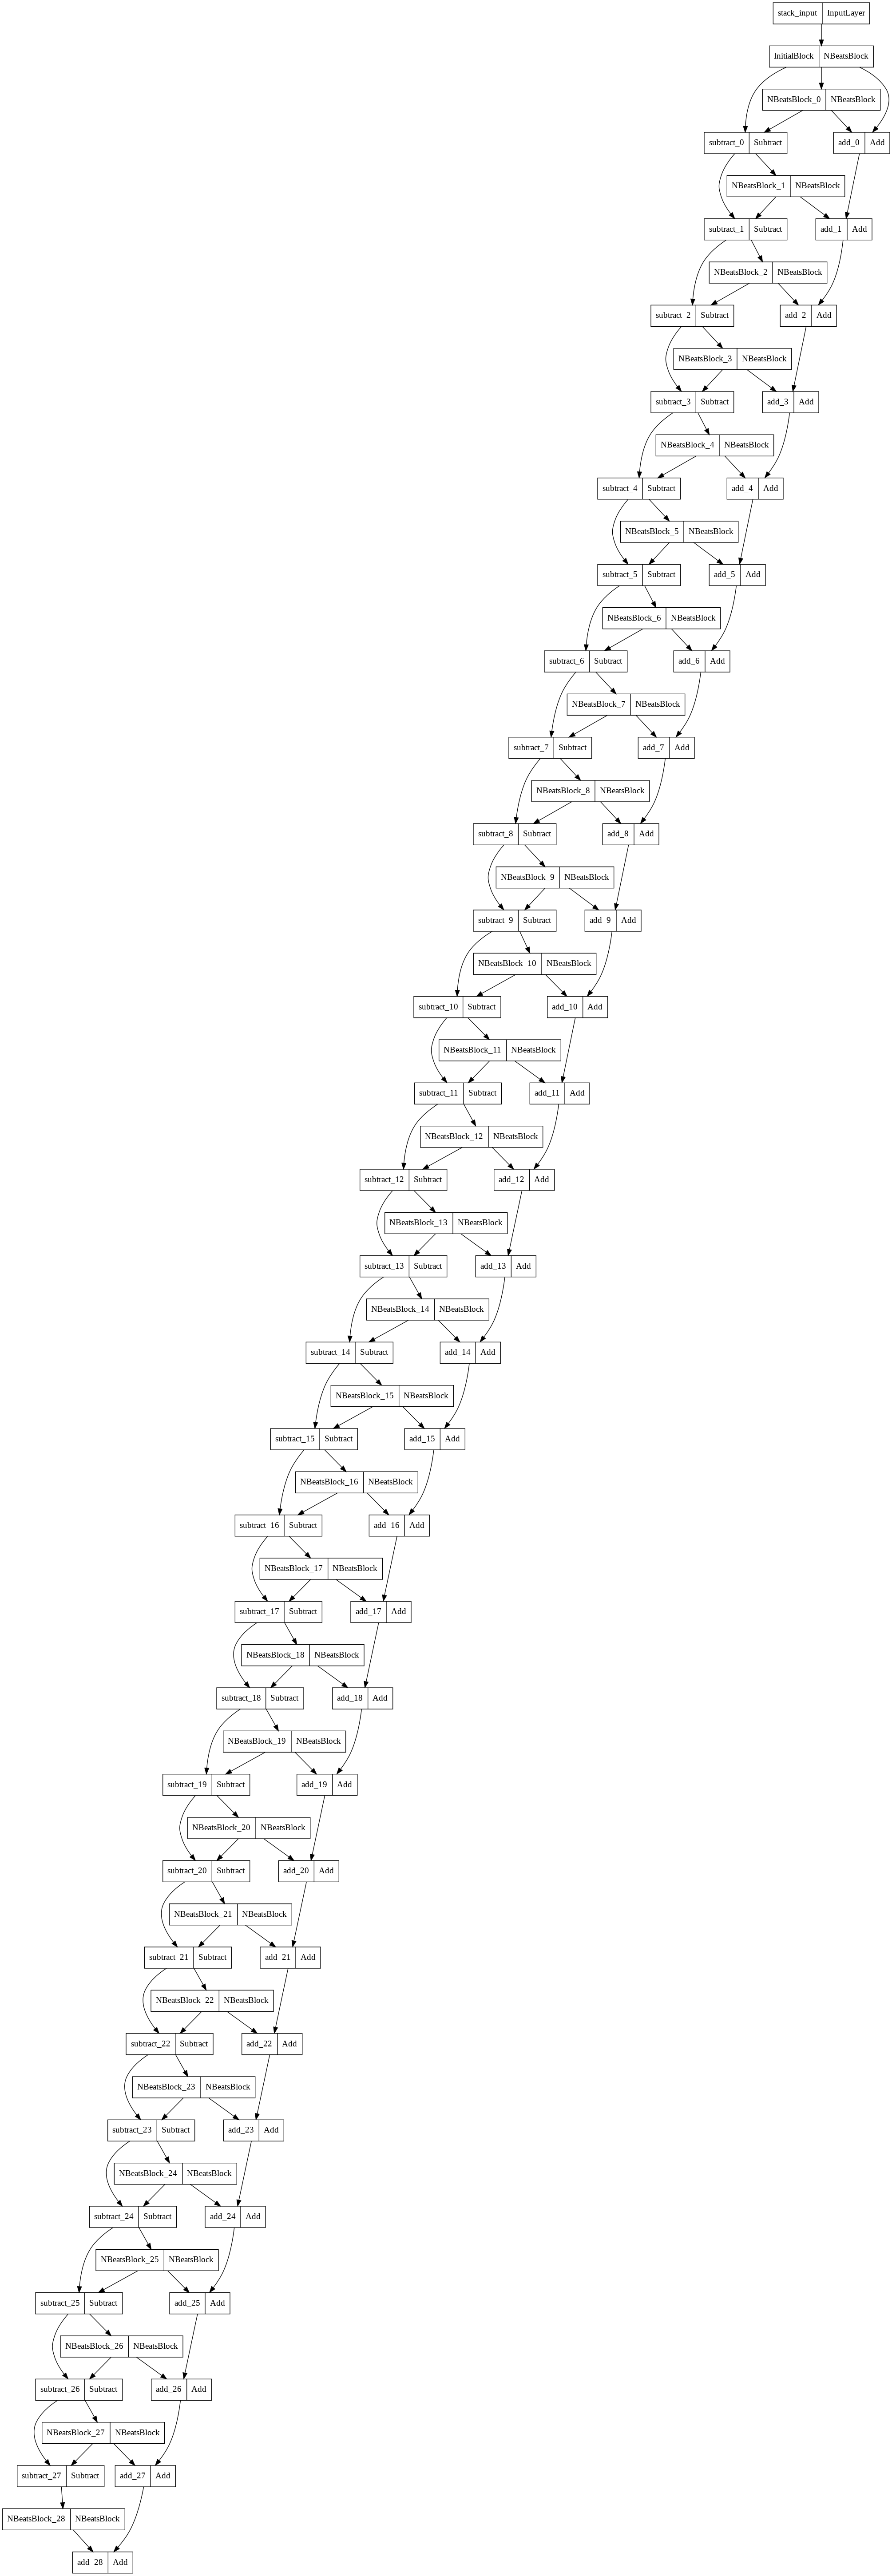

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # number of different models to train
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"])
  """

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
                                   # Initialize dense layers with normal distribution for estimating prediction intervals later on
                                   layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 816: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 928: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 618: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 734: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 834: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 434: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 534: ReduceLROnPl

### Make predictions with our ensemble model


In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 904 ms, sys: 28 ms, total: 932 ms
Wall time: 1.04 s


Our ensemble preds come out in multiple dimensions, to combine them into **point predictions** we can leverage the mean or median of all of the predictions.

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8789.432, 8775.223, 9064.645, 8732.796, 8741.073, 8712.279,
       8667.422, 8477.92 , 8455.314, 8528.33 ], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8778.976, 8776.767, 9065.894, 8715.311, 8755.36 , 8711.592,
       8653.118, 8478.888, 8452.805, 8529.685], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions using mean
ensemble_mean_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_mean_results

{'mae': 566.6763,
 'mape': 2.579272,
 'mase': 0.99549323,
 'mse': 1145492.0,
 'rmse': 1070.2766}

In [ ]:
# Evaluate ensemble model predictions using median
ensemble_median_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_median_results

{'mae': 566.4442,
 'mape': 2.5756571,
 'mase': 0.9950856,
 'mse': 1145654.0,
 'rmse': 1070.3523}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 579.3127,
 'mape': 2.653473,
 'mase': 1.017692,
 'mse': 1182034.5,
 'rmse': 1087.0228}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon=1, our model predicts tomorrow's price of BTC will be $50,000.

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 on the dot, how about 48,000-52,000?

One way to get the 95% confidence prediction intervals for a deep learning model is the boostrap method:
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming our data is normal/Gaussian), 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in step 3 to the mean/median of the predictions made in step 1.

> https://en.wikipedia.org/wiki/1.96

In [ ]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # Step 1

  # Step 2 (stdev)
  std = tf.math.reduce_std(preds, axis=0)

  # Step 3 (multiply std by 1.96)
  interval = 1.96 * std

  # Step 4 (get the upper and lower bounds of pred)
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper/lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8683.493 ,  8725.326 ,  9006.998 ,  8622.731 ,  8659.904 ,
         8650.023 ,  8601.235 ,  8393.093 ,  8395.665 ,  8486.887 ,
         8122.8535,  8046.2305,  7996.255 ,  7535.407 ,  7203.4844,
         7213.669 ,  6973.83  ,  7134.0986,  6988.5464,  7473.222 ,
         7304.7275,  7691.961 ,  7474.219 ,  7301.3345,  7249.8037,
         7256.167 ,  7139.316 ,  7349.2046,  7469.684 ,  7499.9175,
         7481.2275,  7265.5654,  7184.184 ,  7136.6455,  7139.581 ,
         7178.9194,  7021.419 ,  7062.0117,  6796.231 ,  6523.259 ,
         7279.5005,  7074.6353,  7070.601 ,  7159.189 ,  7105.6157,
         7070.0146,  7177.671 ,  7177.923 ,  7143.222 ,  7174.9556,
         7276.8486,  7346.2334,  7190.206 ,  7123.138 ,  7125.6797,
         6891.692 ,  7226.52  ,  7289.642 ,  7309.058 ,  7616.913 ,
         7980.593 ,  8071.4624,  7774.0547,  8014.285 ,  8022.4233,
         8118.66  ,  8017.313 ,  8684.809 ,  8810.37  ,  8681.7295,

In [ ]:
ensemble_median[:10]

array([8778.976, 8776.767, 9065.894, 8715.311, 8755.36 , 8711.592,
       8653.118, 8478.888, 8452.805, 8529.685], dtype=float32)

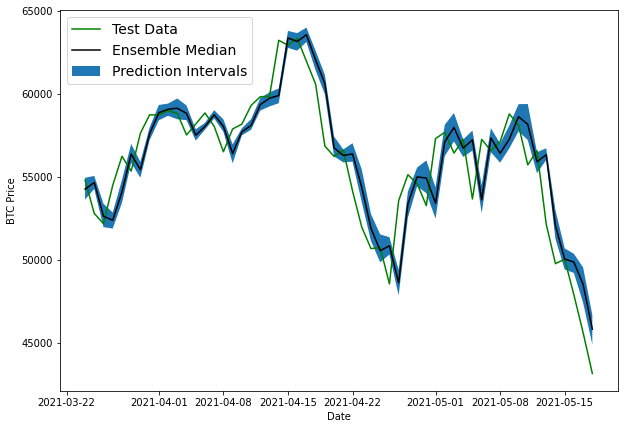

In [ ]:
# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot upper and lower bounds, use fill_between from matplotlib
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmmm....

So far all of our models predictions have been lagging behind the test data...

As if they are replicating what the naive model does and just predict the previous timestep as the next timestep.

## ASIDE: Two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitiatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning to know:
* **Aleatoric Uncertainty** - this type of uncertainty cannot be reduced and it is often referred as data "data" or "subway" uncertainty.
* **Epistemic Uncertainty** - this type of uncertainty *can* be reduced, it is also referred to as "model" or "coconut" uncertainty.

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the ***future***!

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
# Create model_9

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_9_future")

#Compile model
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

 To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (BTC historical data)
  * a trained model (such as `model_9`
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`)
      * a model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts ( this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [ ]:
# 1. Create function to make preds
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after value ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append preds to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
# Make forecasts into future
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96875

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96875   ] -> Prediction: 48137.203125

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96875    48137.203125  ] -> Prediction: 47880.6328125

Predicting on:
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96875    48137.203125   47880.6328125 ] -> Prediction: 46879.71484375

Predicting on:
 [43144.47129086 55764.46484375 50985.9453125  48522.96875
 481

### Plot future forecasts

In [ ]:
future_forecast

[55764.465,
 50985.945,
 48522.97,
 48137.203,
 47880.633,
 46879.715,
 48227.598,
 53963.69,
 49685.56,
 47596.176,
 48114.426,
 48808.004,
 48623.848,
 50178.723]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts so the plot connects
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.97 , 48137.203, 47880.633,
        46879.715, 48227.598, 53963.69 , 49685.56 , 47596.176, 48114.426,
        48808.004, 48623.848, 50178.723], dtype=float32))

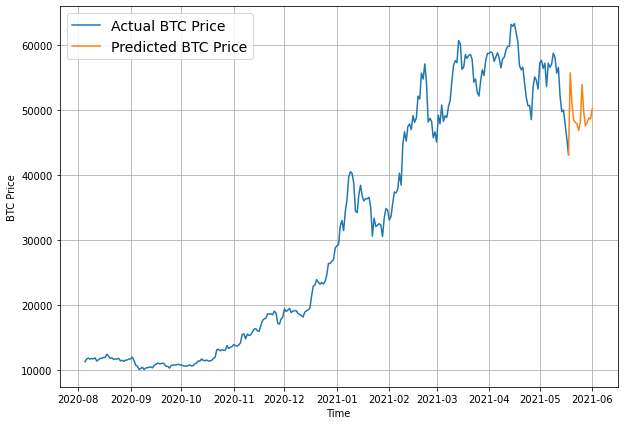

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [ ]:
# manufactured a fake price on the end of the data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
len(btc_price_turkey)

2787

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

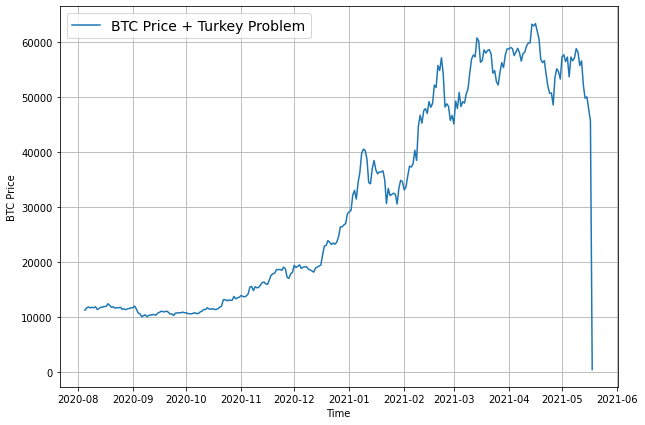

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Create model_10_turkey

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                                layers.Dense(128, activation="relu"),
                                layers.Dense(HORIZON)
], name="model_10_turkey")

# Compile
model_10.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

# Fit
model_10.fit(X_train,
             y_train,
             epochs=100,
             validation_data=(X_test, y_test),
             verbose=0,
             batch_size=128,
             callbacks=[create_model_checkpoint(model_10.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey/assets


In [ ]:
# Evaluate
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 662.7972


662.7972412109375

In [ ]:
# Load best performing and evaluate
model_10 = tf.keras.models.load_model("model_experiments/model_10_turkey/")
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 645.7731


645.7730712890625

In [ ]:
# Make preds
model_10_preds = make_preds(model_10, X_test)
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.713 , 8769.888 , 9015.712 , 8795.52  , 8723.8125, 8730.111 ,
       8691.953 , 8502.056 , 8460.962 , 8516.548 ], dtype=float32)>

In [ ]:
# Evaluate preds
model_10_results = evaluate_preds(y_true=y_test,
                                  y_pred=model_10_preds)
model_10_results

{'mae': 17125.525,
 'mape': 121.30854,
 'mase': 26.501806,
 'mse': 614164900.0,
 'rmse': 23707.303}

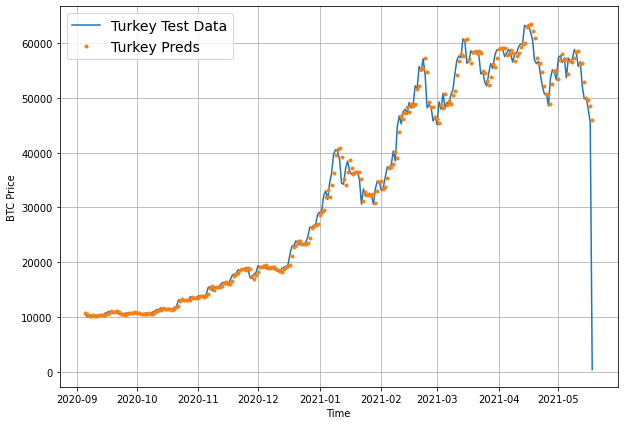

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=model_10_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare Models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": model_10_results}).T

In [ ]:
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951050,1.171744e+06,1082.471191,2.544898,0.999489
model_2_dense_w30_h1,608.961975,1.281441e+06,1132.007324,2.769341,1.064471
model_3_dense_w30_h7,1234.883789,5.393734e+06,1419.136230,5.487498,2.197406
model_4_CONV1D,570.828430,1.176671e+06,1084.744751,2.559336,1.002787
model_5_LSTM,597.462341,1.275416e+06,1129.343140,2.691097,1.049576
model_6_multivariate,568.036011,1.166216e+06,1079.914795,2.546599,0.997882
model_7_NBEATS,573.910828,1.168970e+06,1081.188965,2.609450,1.008202
model_8_ensemble,579.312683,1.182034e+06,1087.022827,2.653473,1.017692
model_10_turkey,17125.525391,6.141649e+08,23707.302734,121.308540,26.501806


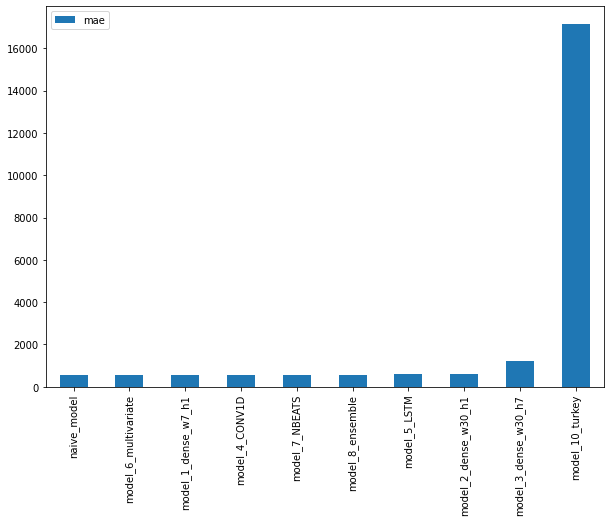

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");